In [1]:
# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd
# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# reading the datasets
input_train_data = pd.read_csv("train_LZdllcl (1).csv")
input_test_data = pd.read_csv("test_2umaH9m (1).csv")
submission = pd.read_csv("sample_submission_M0L0uXE.csv")
input_train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
label = input_train_data["is_promoted"]
input_train_data.drop(columns=["is_promoted", "employee_id"], axis=0, inplace=True)
input_test_data.drop(columns=["employee_id"], axis=0, inplace=True)
a=label.value_counts()
a


0    50140
1     4668
Name: is_promoted, dtype: int64

<AxesSubplot:title={'center':'is promoted'}, ylabel='is_promoted'>

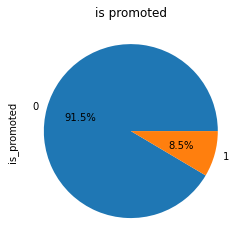

In [4]:
a.plot(kind='pie',title="is promoted", autopct='%1.1f%%')

In [5]:
input_train_data.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


filling null value in datasheet


In [6]:
totaldata = input_train_data.append(input_test_data, ignore_index=True)
print(totaldata["education"].value_counts())
input_train_data["education"] = input_train_data["education"].fillna("Bachelor's")
input_test_data["education"] = input_test_data["education"].fillna("Bachelor's")


print(totaldata["previous_year_rating"].value_counts())
input_train_data["previous_year_rating"] = input_train_data["previous_year_rating"].fillna(3.0)
input_test_data["previous_year_rating"] = input_test_data["previous_year_rating"].fillna(3.0)


Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64
3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64


In [7]:
totaldata.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


Plotting all the attributes 

In [8]:
## Count Function
def count_func(input_train_data,col):
    categories = input_train_data[col].dropna().unique()
    data = {}
    for cat in categories:
        data[cat] = len(input_train_data[input_train_data[col]==cat])
    data = pd.DataFrame(data,index=[0]).T
    data.columns = [col]
    print(data)
    return data

    no_of_trainings
1             44378
2              7987
3              1776
4               468
7                12
5               128
6                44
8                 5
10                5
9                 5


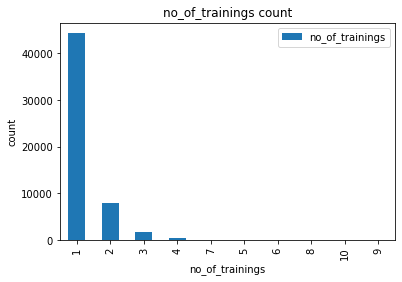

C:\Users\91844\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relation between no_of_trainings and label')

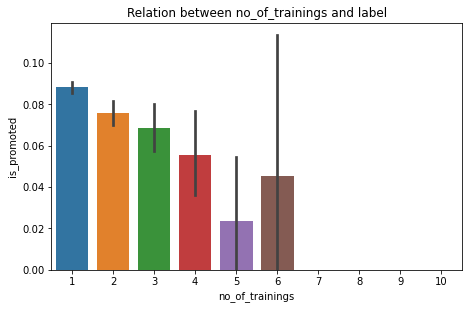

In [9]:
#no_of_trainings count
count_df = count_func(input_train_data,'no_of_trainings')
count_df.plot(kind='bar',title='no_of_trainings count') #using pandas
plt.xlabel('no_of_trainings')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.barplot(input_train_data["no_of_trainings"], label)
plt.title('Relation between no_of_trainings and label')

                   department
Sales & Marketing       16840
Operations              11348
Technology               7138
Analytics                5352
R&D                       999
Procurement              7138
Finance                  2536
HR                       2418
Legal                    1039


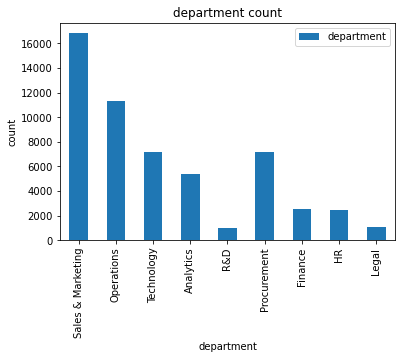

C:\Users\91844\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='department', ylabel='is_promoted'>

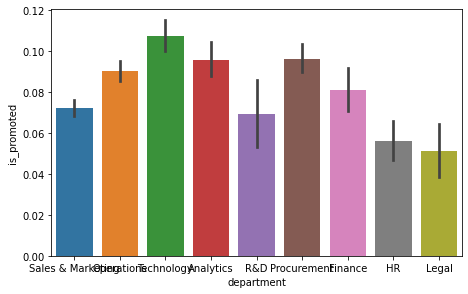

In [10]:
#department count
count_df = count_func(input_train_data,'department')
count_df.plot(kind='bar',title='department count') #using pandas
plt.xlabel('department')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.barplot(input_train_data["department"], label)

           region
region_7     4843
region_22    6428
region_19     874
region_23    1175
region_26    2260
region_2    12343
region_20     850
region_34     292
region_1      610
region_4     1703
region_29     994
region_31    1935
region_15    2808
region_14     827
region_11    1315
region_5      766
region_28    1318
region_17     796
region_13    2648
region_16    1465
region_25     819
region_10     648
region_27    1659
region_30     657
region_12     500
region_21     411
region_8      655
region_32     945
region_6      690
region_33     269
region_24     508
region_3      346
region_9      420
region_18      31


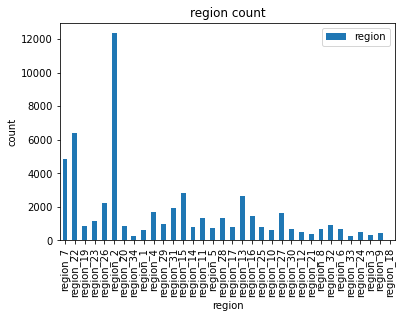

C:\Users\91844\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='is_promoted'>

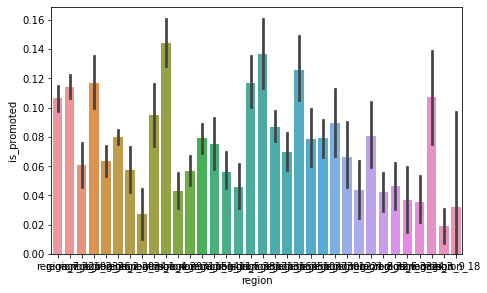

In [11]:
#region count
count_df = count_func(input_train_data,'region')
count_df.plot(kind='bar',title='region count') #using pandas
plt.xlabel('region')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.barplot(input_train_data["region"], label)

                  education
Master's & above      14925
Bachelor's            39078
Below Secondary         805


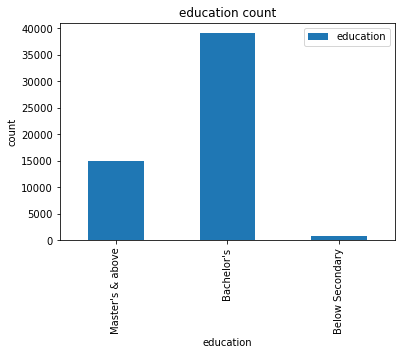

C:\Users\91844\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='is_promoted'>

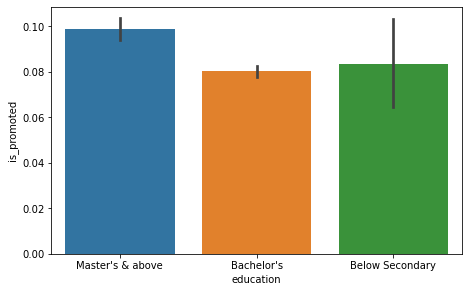

In [12]:
#education count
count_df = count_func(input_train_data,'education')
count_df.plot(kind='bar',title='education count') #using pandas
plt.xlabel('education')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.barplot(input_train_data["education"], label)

   gender
f   16312
m   38496


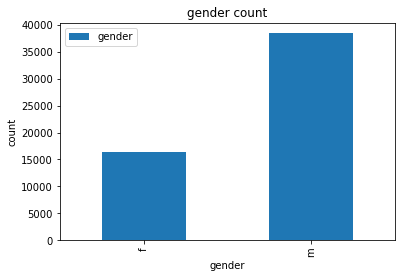

C:\Users\91844\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='is_promoted'>

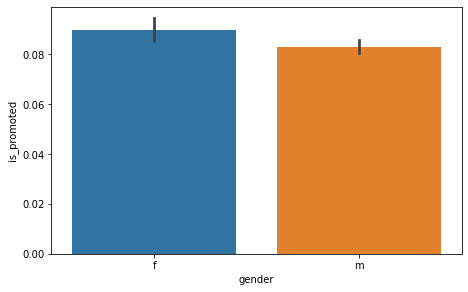

In [13]:
#gender count
count_df = count_func(input_train_data,'gender')
count_df.plot(kind='bar',title='gender count') #using pandas
plt.xlabel('gender')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.barplot(input_train_data["gender"], label)

     age
35  2711
30  3665
34  3076
39  1695
45   760
31  3534
33  3210
28  3147
32  3534
49   441
37  2165
38  1923
41  1289
27  2827
29  3405
26  2060
24   845
57   238
40  1663
42  1149
23   428
59   209
44   847
50   521
56   264
20   113
25  1299
47   557
36  2517
46   697
60   217
43   992
22   231
54   313
58   213
48   557
53   364
55   294
51   389
52   351
21    98


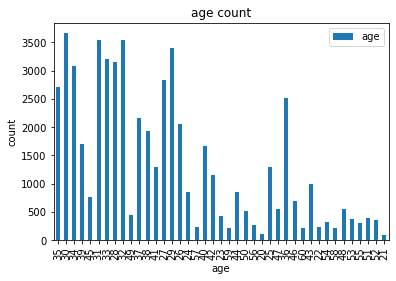

C:\Users\91844\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='is_promoted'>

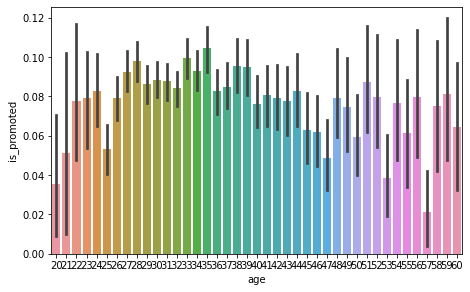

In [14]:
#age count
count_df = count_func(input_train_data,'age')
count_df.plot(kind='bar',title='age count') #using pandas
plt.xlabel('age')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.barplot(input_train_data["age"], label)

     previous_year_rating
5.0                 11741
3.0                 22742
1.0                  6223
4.0                  9877
2.0                  4225


C:\Users\91844\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\91844\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


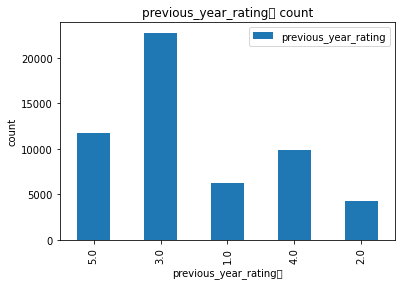

C:\Users\91844\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous_year_rating', ylabel='is_promoted'>

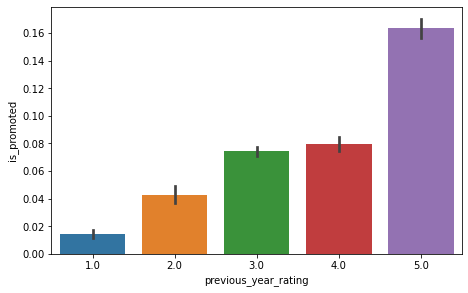

In [15]:
#previous_year_rating	 count
count_df = count_func(input_train_data,'previous_year_rating')
count_df.plot(kind='bar',title='previous_year_rating	 count') #using pandas
plt.xlabel('previous_year_rating	')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.barplot(input_train_data["previous_year_rating"], label)

     previous_year_rating
5.0                 11741
3.0                 22742
1.0                  6223
4.0                  9877
2.0                  4225


C:\Users\91844\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\91844\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


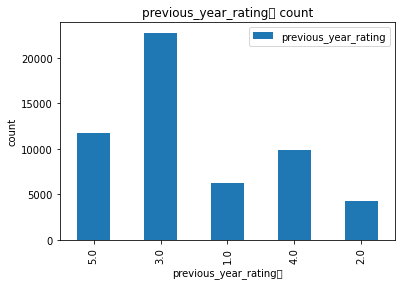

C:\Users\91844\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous_year_rating', ylabel='is_promoted'>

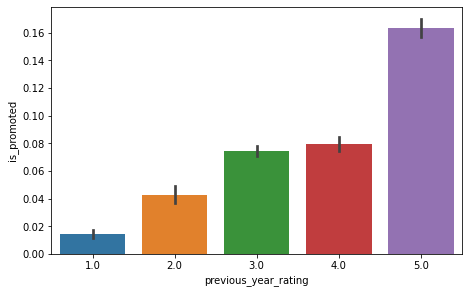

In [16]:
#previous_year_rating	 count
count_df = count_func(input_train_data,'previous_year_rating')
count_df.plot(kind='bar',title='previous_year_rating	 count') #using pandas
plt.xlabel('previous_year_rating	')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.barplot(input_train_data["previous_year_rating"], label)

    length_of_service
8                2883
4                6836
7                5551
10               2193
2                6684
5                5832
6                4734
1                4547
3                7033
16                548
9                2629
11                916
26                 41
12                794
17                432
14                549
13                687
19                329
15                593
23                 65
18                392
20                128
22                 61
25                 51
28                 30
24                 70
31                 20
21                 78
29                 30
30                 12
34                  4
27                 36
33                  9
32                 10
37                  1


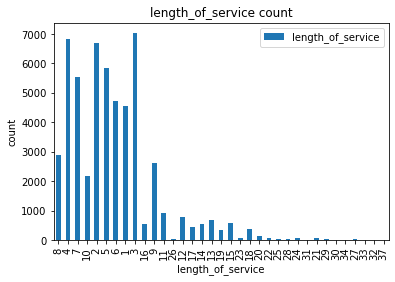

C:\Users\91844\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length_of_service', ylabel='is_promoted'>

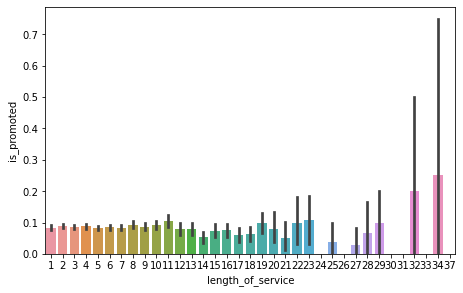

In [17]:
#length_of_service count
count_df = count_func(input_train_data,'length_of_service')
count_df.plot(kind='bar',title='length_of_service count') #using pandas
plt.xlabel('length_of_service')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.barplot(input_train_data["length_of_service"], label)

   KPIs_met >80%
1          19291
0          35517


C:\Users\91844\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\91844\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


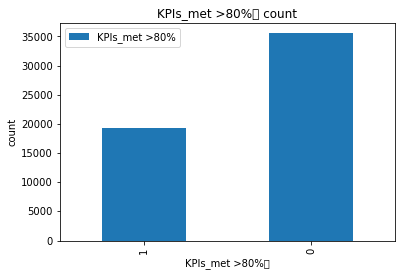

C:\Users\91844\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KPIs_met >80%', ylabel='is_promoted'>

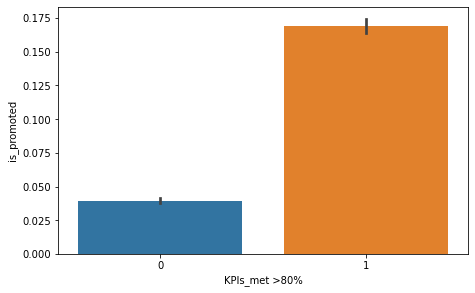

In [18]:
#KPIs_met >80%	 count
count_df = count_func(input_train_data,'KPIs_met >80%')
count_df.plot(kind='bar',title='KPIs_met >80%	 count') #using pandas
plt.xlabel('KPIs_met >80%	')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.barplot(input_train_data["KPIs_met >80%"], label)

   awards_won?
0        53538
1         1270


C:\Users\91844\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\91844\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


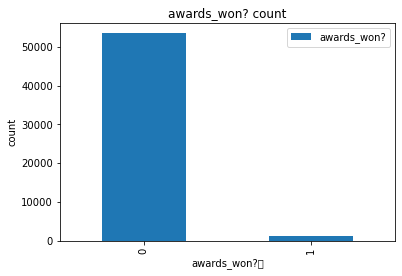

C:\Users\91844\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='awards_won?', ylabel='is_promoted'>

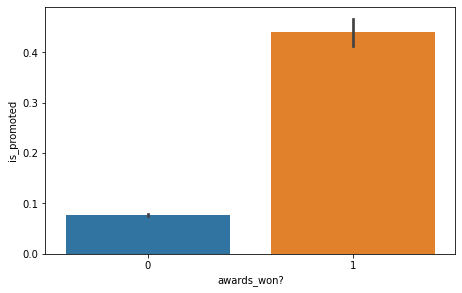

In [19]:
#awards_won?	 count
count_df = count_func(input_train_data,'awards_won?')
count_df.plot(kind='bar',title='awards_won? count') #using pandas
plt.xlabel('awards_won?	')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.barplot(input_train_data["awards_won?"], label)

    avg_training_score
49                2681
60                2155
50                2716
73                 523
85                1072
..                 ...
99                  35
43                 176
97                  49
41                  26
98                  37

[61 rows x 1 columns]


C:\Users\91844\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\91844\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


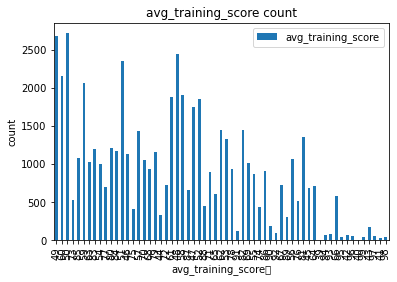

C:\Users\91844\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_training_score', ylabel='is_promoted'>

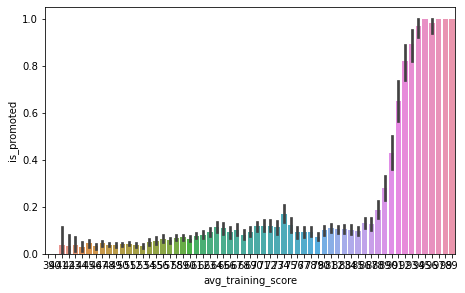

In [20]:
#avg_training_score	 count
count_df = count_func(input_train_data,'avg_training_score')
count_df.plot(kind='bar',title='avg_training_score count') #using pandas
plt.xlabel('avg_training_score	')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.barplot(input_train_data["avg_training_score"], label)

Feature Engineering


In [21]:
# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum
input_train_data['sum_metric'] = input_train_data['awards_won?']+input_train_data['KPIs_met >80%'] + input_train_data['previous_year_rating']
input_test_data['sum_metric'] = input_test_data['awards_won?']+input_test_data['KPIs_met >80%'] + input_test_data['previous_year_rating']

# creating a total score column
input_train_data['total_score'] = input_train_data['avg_training_score'] * input_train_data['no_of_trainings']
input_test_data['total_score'] = input_test_data['avg_training_score'] * input_test_data['no_of_trainings']

In [22]:
#  removing some of the columns which are not very useful for predicting the promotion.
input_train_data = input_train_data.drop(['recruitment_channel', 'region'], axis = 1)
input_test_data = input_test_data.drop(['recruitment_channel', 'region'], axis = 1)
input_train_data.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'sum_metric', 'total_score'],
      dtype='object')

Dealing with Categorical Columns

In [23]:
# Lets check the categorical columns present in the data
input_train_data.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [24]:
# lets check the value counts for the education column
input_train_data['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [25]:
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
input_train_data['education'] = input_train_data['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
input_test_data['education'] = input_test_data['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
input_train_data['education'].head(20)

0     3
1     2
2     2
3     2
4     2
5     2
6     2
7     3
8     2
9     3
10    2
11    2
12    2
13    3
14    3
15    2
16    2
17    2
18    2
19    2
Name: education, dtype: int64

In [26]:
# lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
input_train_data['department'] = le.fit_transform(input_train_data['department'])
input_test_data['department'] = le.fit_transform(input_test_data['department'])
input_train_data['gender'] = le.fit_transform(input_train_data['gender'])
input_test_data['gender'] = le.fit_transform(input_test_data['gender'])

input_train_data.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,3.0,73


In [27]:
input_test_data.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,sum_metric,total_score
0,8,2,1,1,24,3.0,1,1,0,77,4.0,77
1,2,2,0,1,31,3.0,5,0,0,51,3.0,51
2,7,2,1,1,31,1.0,4,0,0,47,1.0,47
3,5,2,0,3,31,2.0,9,0,0,65,2.0,195
4,1,2,1,1,30,4.0,7,0,0,61,4.0,61


Splitting the Data

In [28]:
# lets split the target data from the train data

y = label
x = input_train_data
x_test = input_test_data

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (54808, 12)
Shape of the y : (54808,)
Shape of the x Test : (23490, 12)


In [29]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [30]:
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (43846, 12)
Shape of the y Train : (43846,)
Shape of the x Valid : (10962, 12)
Shape of the y Valid : (10962,)
Shape of the x Test : (23490, 12)


Feature Scaling

In [31]:
# lets import the standard scaler library from sklearn to do that
#helps to normalize the data
# It is very import to scale all the features of the dataset into the same scale
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

Model Development

In [32]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
# lets take a look at the Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10041
           1       0.45      0.44      0.44       921

    accuracy                           0.91     10962
   macro avg       0.70      0.69      0.70     10962
weighted avg       0.91      0.91      0.91     10962



In [34]:
#predtiction for testing data
# y_pred2=model.predict(x_test)
# y_pred2

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [35]:
# y_test=submission['is_promoted']
# y_test.shape

(23490,)

In [36]:
# df=pd.DataFrame({'actual':y_test,'predicted':y_pred2})
# df.head(10)

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,1


In [40]:
# cr2=classification_report(y_test, y_pred2)
# print(cr2)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     23490
           1       0.00      0.00      0.00         0

    accuracy                           0.91     23490
   macro avg       0.50      0.45      0.48     23490
weighted avg       1.00      0.91      0.95     23490



C:\Users\91844\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91844\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91844\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# df1 = pd.read_csv('test_2umaH9m (1).csv')
# df2 = pd.DataFrame(y_pred2, columns=['is_promoted'])
# df3 = pd.concat([df1['employee_id'],df2],axis = 'columns')
# df3.info()
# df3
# df3.to_csv('submission.csv',index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   employee_id  23490 non-null  int64
 1   is_promoted  23490 non-null  int64
dtypes: int64(2)
memory usage: 367.2 KB
